# House Grade & Price Prediction



Dataset shows a basic trend in the house type grading and pricing in terms of its location, the area of construction, its interior, etc.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,r2_score,mean_absolute_error,mean_squared_error
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

Mapping values
*   1-3->0--->Bad
*   4-5->1--->Below Average
*   6-8->2--->Average
*   9-10->3--->Above Average
*   11-13->4--->Good


In [ ]:
df['grade']=df['grade'].map({1:0,2:0,3:0,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:4,12:4,13:4})

In [ ]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,2,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,2,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,2,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,2,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,2,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,...,2,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,...,2,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,...,2,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,...,2,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df['grade'].value_counts()

2    17087
3     3749
4      502
1      271
0        4
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

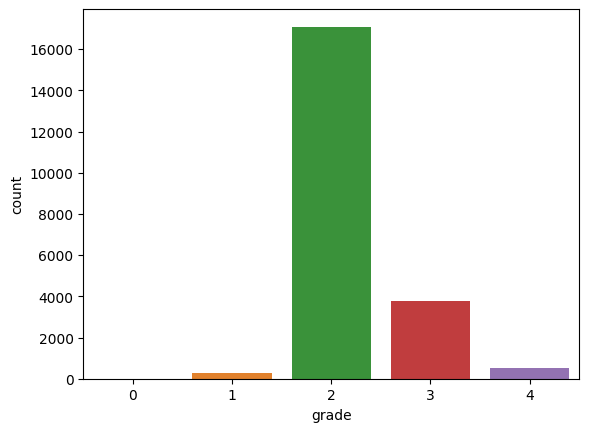

In [ ]:
sns.countplot(x='grade',data=df)

In [ ]:
df=df.iloc[:,3:17]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,2,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,2,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,2,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,2,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,2,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,2,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,2,1600,0,2004,0


In [ ]:
df.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,2,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,2,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,2,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,2,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,2,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,2,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,2,1600,0,2004,0


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,2.207005,1788.390691,291.509045,1971.005136,84.402258
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,0.486628,828.090978,442.575043,29.373411,401.679240
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,290.000000,0.000000,1900.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,2.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,2.000000,1560.000000,0.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2.000000,2210.000000,560.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000


In [ ]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
C=df.corr()
C

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.631752,0.605567,0.323816,0.054012,0.126434
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.285832,0.477600,0.303093,0.154178,0.018841
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.526102,0.685342,0.283770,0.506019,0.050739
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.684575,0.876597,0.435043,0.318049,0.055363
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.121347,0.183512,0.015286,0.053080,0.007644
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.345561,0.523885,-0.245705,0.489319,0.006338
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.084908,0.072075,0.080588,-0.026161,0.092885
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.240928,0.167649,0.276947,-0.053440,0.103917
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.115985,-0.158214,0.174105,-0.361417,-0.060618
grade,0.631752,0.285832,0.526102,0.684575,0.121347,0.345561,0.084908,0.240928,-0.115985,1.000000,0.691831,0.126176,0.314483,0.016236


<Axes: >

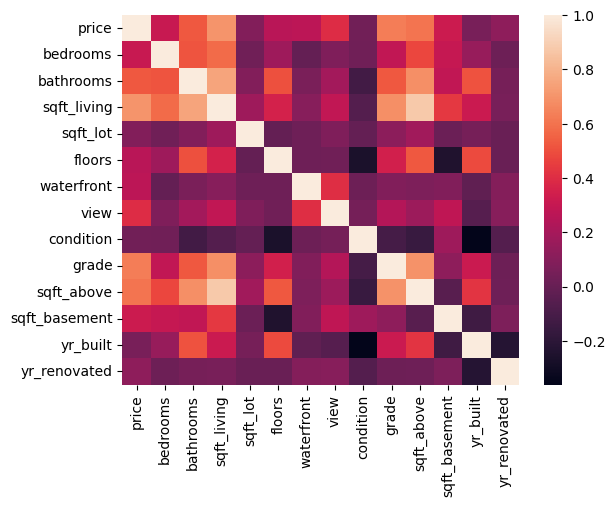

In [ ]:
sns.heatmap(C)

#Classification

In [ ]:
X=df.drop(columns=['grade'],axis=1)
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0


In [ ]:
y=df['grade']
y

0        2
1        2
2        2
3        2
4        2
        ..
21608    2
21609    2
21610    2
21611    2
21612    2
Name: grade, Length: 21613, dtype: int64

In [ ]:
std=StandardScaler()
Xsc=std.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.3,random_state=1)

# Parameter Tuning


## KNN

In [ ]:
knn=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9,11,13],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],}
clfk=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clfk.fit(X_train,y_train)
print(clfk.best_params_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
knn1=KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='auto')
knn1.fit(X_train,y_train)
ypred=knn1.predict(X_test)
ypred

array([2, 2, 3, ..., 2, 4, 2])

0.8918877236273905
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.05      0.31      0.08        13
           2       0.96      0.93      0.94      5338
           3       0.70      0.72      0.71      1032
           4       0.47      0.79      0.59       101

    accuracy                           0.89      6484
   macro avg       0.44      0.55      0.47      6484
weighted avg       0.91      0.89      0.90      6484



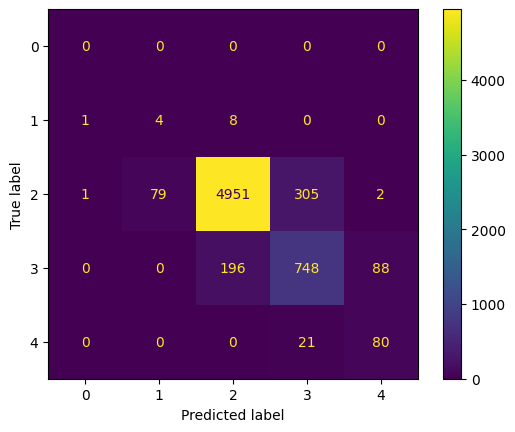

In [ ]:
A1=accuracy_score(ypred,y_test)
print(A1)
print(classification_report(ypred,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred,y_test))

##SVM

In [ ]:
svm=SVC()
params={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto']}
clf=GridSearchCV(svm,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm1=SVC(gamma='scale',kernel='rbf')
svm1.fit(X_train,y_train)
ypred2=svm1.predict(X_test)
ypred2

array([2, 2, 3, ..., 2, 4, 2])

0.8908081431215299
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.97      0.92      0.94      5408
           3       0.68      0.73      0.70       993
           4       0.39      0.81      0.53        83

    accuracy                           0.89      6484
   macro avg       0.41      0.49      0.44      6484
weighted avg       0.91      0.89      0.90      6484



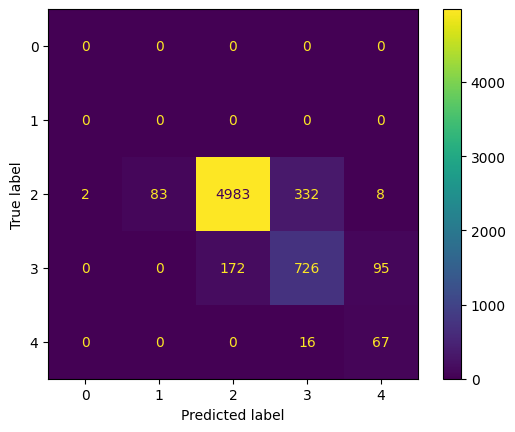

In [ ]:
A2=accuracy_score(ypred2,y_test)
print(A2)
print(classification_report(ypred2,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred2,y_test))

##Naive Bayes

In [ ]:
nb1=GaussianNB()
nb1.fit(X_train,y_train)
ypred3=nb1.predict(X_test)
ypred3

array([3, 2, 3, ..., 2, 4, 3])

0.7817705120296113
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      0.10      0.18       608
           2       0.80      0.94      0.87      4401
           3       0.70      0.61      0.65      1249
           4       0.65      0.49      0.56       226

    accuracy                           0.78      6484
   macro avg       0.58      0.43      0.45      6484
weighted avg       0.77      0.78      0.75      6484



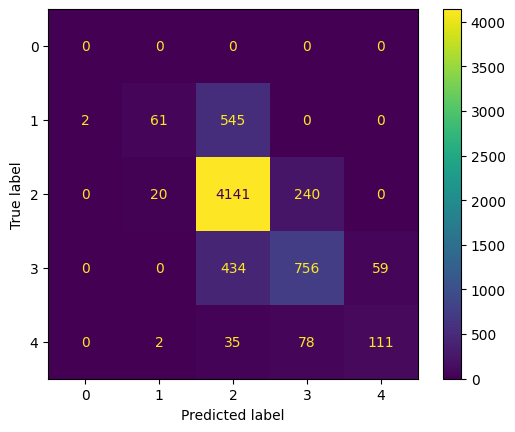

In [ ]:
A3=accuracy_score(ypred3,y_test)
print(A3)
print(classification_report(ypred3,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred3,y_test))

##Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}
clf=GridSearchCV(rf,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'gini'}


In [ ]:
rf1=RandomForestClassifier(n_estimators=100,criterion='gini')
rf1.fit(X_train,y_train)
ypred4=rf1.predict(X_test)
ypred4

array([2, 2, 3, ..., 2, 4, 2])

0.8997532387415176
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.50      0.25        28
           2       0.96      0.94      0.95      5288
           3       0.72      0.74      0.73      1043
           4       0.56      0.77      0.65       125

    accuracy                           0.90      6484
   macro avg       0.48      0.59      0.52      6484
weighted avg       0.91      0.90      0.90      6484



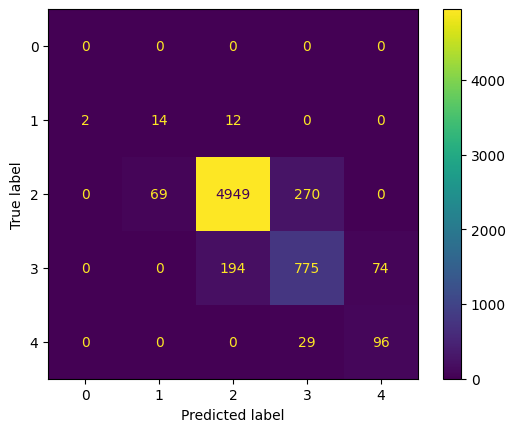

In [ ]:
A4=accuracy_score(ypred4,y_test)
print(A4)
print(classification_report(ypred4,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred4,y_test))

##Logistic Regression

In [ ]:
lr1=LogisticRegression()
params={'penalty':['l1','l2','elasticnet'],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}
clf=GridSearchCV(lr1,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr1=LogisticRegression(penalty='l2',solver='newton-cg')
lr1.fit(X_train,y_train)
ypred5=lr1.predict(X_test)
ypred5

array([2, 2, 3, ..., 2, 3, 2])

0.8854102405922271
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.06      0.42      0.11        12
           2       0.96      0.92      0.94      5353
           3       0.67      0.71      0.69      1017
           4       0.46      0.78      0.58       101

    accuracy                           0.89      6484
   macro avg       0.53      0.77      0.60      6484
weighted avg       0.90      0.89      0.89      6484



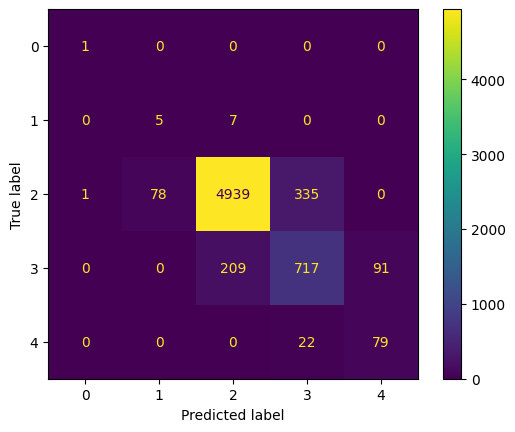

In [ ]:
A5=accuracy_score(ypred5,y_test)
print(A5)
print(classification_report(ypred5,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred5,y_test))

##Adaboost Classifier

In [ ]:
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
ypred6=abc.predict(X_test)
ypred6

array([3, 2, 2, ..., 2, 4, 3])

0.838371375694016
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.92      0.93      0.92      5102
           3       0.53      0.58      0.56       987
           4       0.82      0.35      0.50       395

    accuracy                           0.84      6484
   macro avg       0.45      0.37      0.39      6484
weighted avg       0.85      0.84      0.84      6484



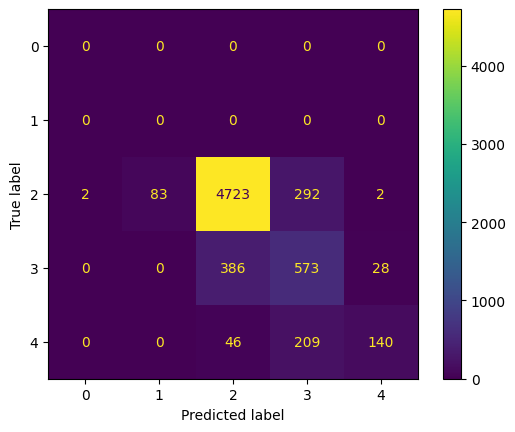

In [ ]:
A6=accuracy_score(ypred6,y_test)
print(A6)
print(classification_report(ypred6,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred6,y_test))

##Extreme Gradient Boosting

In [ ]:
xgb1=XGBClassifier()
xgb1.fit(X_train,y_train)
ypred7=xgb1.predict(X_test)
ypred7

array([2, 2, 3, ..., 2, 4, 2])

0.8962060456508328
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.29      0.55      0.38        44
           2       0.95      0.94      0.94      5228
           3       0.73      0.72      0.73      1082
           4       0.59      0.78      0.67       130

    accuracy                           0.90      6484
   macro avg       0.51      0.60      0.54      6484
weighted avg       0.90      0.90      0.90      6484



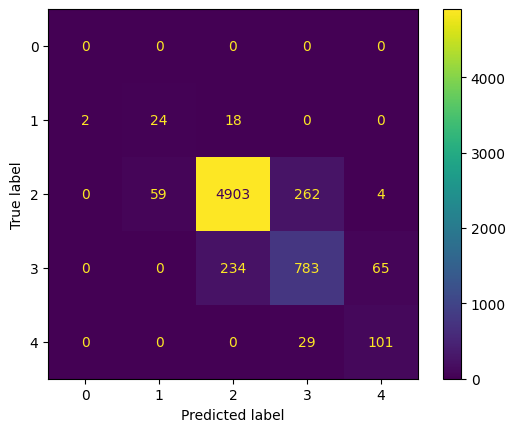

In [ ]:
A7=accuracy_score(ypred7,y_test)
print(A7)
print(classification_report(ypred7,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred7,y_test))

##Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
params={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
clf=GridSearchCV(dt,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'log_loss', 'splitter': 'best'}


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',splitter='best')
dt1.fit(X_train,y_train)
ypred8=dt1.predict(X_test)
ypred8

array([3, 2, 3, ..., 2, 2, 2])

0.8542566317088217
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.29      0.28      0.29        85
           2       0.92      0.92      0.92      5116
           3       0.64      0.62      0.63      1117
           4       0.58      0.59      0.59       165

    accuracy                           0.85      6484
   macro avg       0.58      0.68      0.62      6484
weighted avg       0.85      0.85      0.85      6484



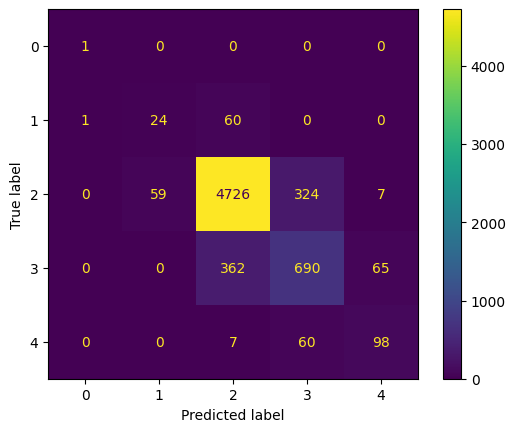

In [ ]:
A8=accuracy_score(ypred8,y_test)
print(A8)
print(classification_report(ypred8,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred8,y_test))

#SAMPLING

In [ ]:
oversample=SMOTE(k_neighbors=3,random_state=1)
X_os,y_os=oversample.fit_resample(X,y)
y_os.value_counts()

2    17087
4    17087
3    17087
1    17087
0    17087
Name: grade, dtype: int64

In [ ]:
print(Counter(y_os))

Counter({2: 17087, 4: 17087, 3: 17087, 1: 17087, 0: 17087})


In [ ]:
X_trainos,X_testos,y_trainos,y_testos=train_test_split(X_os,y_os,test_size=0.2,random_state=1)

##KNN

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_trainos,y_trainos)
y_predos1=knn2.predict(X_testos)
y_predos1

array([3, 1, 1, ..., 4, 4, 1])

In [ ]:
print(classification_report(y_testos,y_predos1))
S1=accuracy_score(y_testos,y_predos1)
print(S1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3408
           1       0.90      0.97      0.94      3378
           2       0.92      0.73      0.81      3493
           3       0.83      0.89      0.86      3371
           4       0.94      0.98      0.96      3437

    accuracy                           0.91     17087
   macro avg       0.91      0.91      0.91     17087
weighted avg       0.91      0.91      0.91     17087

0.9135014923626149


##SVM

In [ ]:
svm2=SVC()
svm2.fit(X_trainos,y_trainos)
ypredos2=svm2.predict(X_testos)
ypredos2

array([3, 1, 1, ..., 4, 4, 2])

In [ ]:
print(classification_report(y_testos,ypredos2))
S2=accuracy_score(y_testos,ypredos2)
print(S2)

              precision    recall  f1-score   support

           0       0.83      0.87      0.84      3408
           1       0.63      0.63      0.63      3378
           2       0.59      0.54      0.56      3493
           3       0.60      0.57      0.59      3371
           4       0.77      0.84      0.81      3437

    accuracy                           0.69     17087
   macro avg       0.68      0.69      0.69     17087
weighted avg       0.68      0.69      0.69     17087

0.689237431965822


##Naive Bayes

In [ ]:
nb2=GaussianNB()
nb2.fit(X_trainos,y_trainos)
ypredos3=nb2.predict(X_testos)
ypredos3

array([4, 1, 1, ..., 3, 4, 1])

In [ ]:
print(classification_report(y_testos,ypredos3))
S3=accuracy_score(y_testos,ypredos3)
print(S3)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3408
           1       0.73      0.59      0.65      3378
           2       0.74      0.66      0.69      3493
           3       0.68      0.77      0.72      3371
           4       0.88      0.76      0.82      3437

    accuracy                           0.76     17087
   macro avg       0.76      0.76      0.75     17087
weighted avg       0.76      0.76      0.75     17087

0.7556621993328261


##Random Forest

In [ ]:
rf2=RandomForestClassifier(n_estimators=100)
rf2.fit(X_trainos,y_trainos)
ypredos4=rf2.predict(X_testos)
ypredos4

array([3, 1, 1, ..., 4, 4, 1])

In [ ]:
print(classification_report(y_testos,ypredos4))
S4=accuracy_score(y_testos,ypredos4)
print(S4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3408
           1       0.98      1.00      0.99      3378
           2       0.96      0.91      0.93      3493
           3       0.92      0.94      0.93      3371
           4       0.97      1.00      0.98      3437

    accuracy                           0.97     17087
   macro avg       0.97      0.97      0.97     17087
weighted avg       0.97      0.97      0.97     17087

0.966758354304442


##Logistic Regression

In [ ]:
lr2=LogisticRegression()
lr2.fit(X_trainos,y_trainos)
ypredos5=lr2.predict(X_testos)
ypredos5

array([3, 2, 1, ..., 3, 4, 2])

In [ ]:
print(classification_report(y_testos,ypredos5))
S5=accuracy_score(y_testos,ypredos5)
print(S5)

              precision    recall  f1-score   support

           0       0.87      0.72      0.78      3408
           1       0.56      0.59      0.57      3378
           2       0.60      0.59      0.60      3493
           3       0.52      0.62      0.56      3371
           4       0.69      0.65      0.67      3437

    accuracy                           0.63     17087
   macro avg       0.65      0.63      0.64     17087
weighted avg       0.65      0.63      0.64     17087

0.6325276526013929


##Adaboost Classifier

In [ ]:
abc2=AdaBoostClassifier()
abc2.fit(X_trainos,y_trainos)
ypredos6=abc2.predict(X_testos)
ypredos6

array([4, 1, 1, ..., 4, 4, 1])

In [ ]:
print(classification_report(y_testos,ypredos6))
S6=accuracy_score(y_testos,ypredos6)
print(S6)

              precision    recall  f1-score   support

           0       1.00      0.40      0.58      3408
           1       0.40      1.00      0.57      3378
           2       1.00      0.00      0.00      3493
           3       0.54      0.18      0.27      3371
           4       0.55      0.99      0.71      3437

    accuracy                           0.51     17087
   macro avg       0.70      0.51      0.43     17087
weighted avg       0.70      0.51      0.42     17087

0.5128460232925616


##Extreme Gradient Boosting

In [ ]:
xgb2=XGBClassifier()
xgb2.fit(X_trainos,y_trainos)
ypredos7=xgb2.predict(X_testos)
ypredos7

array([3, 1, 1, ..., 4, 4, 1])

In [ ]:
print(classification_report(y_testos,ypredos7))
S7=accuracy_score(y_testos,ypredos7)
print(S7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3408
           1       0.99      1.00      0.99      3378
           2       0.95      0.92      0.94      3493
           3       0.93      0.92      0.92      3371
           4       0.96      1.00      0.98      3437

    accuracy                           0.97     17087
   macro avg       0.97      0.97      0.97     17087
weighted avg       0.97      0.97      0.97     17087

0.9658804939427635


##Decision Tree Classifier

In [ ]:
dt2=DecisionTreeClassifier()
dt2.fit(X_trainos,y_trainos)
ypredos8=dt2.predict(X_testos)
ypredos8

array([3, 1, 1, ..., 4, 4, 1])

In [ ]:
print(classification_report(y_testos,ypredos8))
S8=accuracy_score(y_testos,ypredos8)
print(S8)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3408
           1       0.98      0.98      0.98      3378
           2       0.90      0.88      0.89      3493
           3       0.88      0.88      0.88      3371
           4       0.96      0.98      0.97      3437

    accuracy                           0.94     17087
   macro avg       0.94      0.94      0.94     17087
weighted avg       0.94      0.94      0.94     17087

0.9445777491660327


In [ ]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0


In [ ]:
eval=pd.DataFrame({'model':['K Nearest Neighbour','Support Vector Machine','Naive Bayes','Random Forest','Logistic Regression','Adaboost','Extreme Gradient Boost','Decision Tree'],'Accuracy with tuning':[A1*100,A2*100,A3*100,A4*100,A5*100,A6*100,A7*100,A8*100],'Accuracy with sampling':[S1*100,S2*100,S3*100,S4*100,S5*100,S6*100,S7*100,S8*100]})
eval

,model,Accuracy with tuning,Accuracy with sampling
0,K Nearest Neighbour,89.188772,91.350149
1,Support Vector Machine,89.080814,68.923743
2,Naive Bayes,78.177051,75.566220
3,Random Forest,89.975324,96.675835
4,Logistic Regression,88.541024,63.252765
5,Adaboost,83.837138,51.284602
6,Extreme Gradient Boost,89.620605,96.588049
7,Decision Tree,85.425663,94.457775


#PCA

In [ ]:
pca=PCA(n_components=13)
df2=pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.87524631e-01, 1.24667593e-02, 5.52067610e-06, 1.92905331e-06,
       1.15499895e-06, 4.51234615e-09, 4.27457971e-12, 3.38753966e-12,
       2.55493538e-12, 1.66305893e-12, 9.33393336e-13, 4.41357932e-14,
       2.06613781e-37])

In [ ]:
X1=X.drop(columns=['sqft_living','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement'])
X1

,price,bedrooms,bathrooms,floors,yr_built,yr_renovated
0,221900.0,3,1.00,1.0,1955,0
1,538000.0,3,2.25,2.0,1951,1991
2,180000.0,2,1.00,1.0,1933,0
3,604000.0,4,3.00,1.0,1965,0
4,510000.0,3,2.00,1.0,1987,0
...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,2009,0
21609,400000.0,4,2.50,2.0,2014,0
21610,402101.0,2,0.75,2.0,2009,0
21611,400000.0,3,2.50,2.0,2004,0


In [ ]:
std=StandardScaler()
Xpca=std.fit_transform(X1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xpca,y,test_size=0.3,random_state=1)

In [ ]:
knn=KNeighborsClassifier()
svm=SVC()
nb=GaussianNB()
rf=RandomForestClassifier()
lr=LogisticRegression()
abc=AdaBoostClassifier()
xgb=XGBClassifier()
dt=DecisionTreeClassifier()
ls=[knn,svm,nb,rf,lr,abc,xgb,dt]
lis=[]
for i in ls:
  i.fit(X_train,y_train)
  ypred=i.predict(X_test)
  ac=accuracy_score(ypred,y_test)
  lis.append(ac)
lis

[0.8743059839605182,
 0.8838679827267119,
 0.8144663787785318,
 0.8733806292412092,
 0.8726095003084515,
 0.8431523750771129,
 0.8817088217149908,
 0.8322023442319556]

In [ ]:
eval['Accuracy after PCA']=lis
eval

,model,Accuracy with tuning,Accuracy with sampling,Accuracy after PCA
0,K Nearest Neighbour,89.188772,91.350149,0.874306
1,Support Vector Machine,89.080814,68.923743,0.883868
2,Naive Bayes,78.177051,75.566220,0.814466
3,Random Forest,89.975324,96.675835,0.873381
4,Logistic Regression,88.541024,63.252765,0.872610
5,Adaboost,83.837138,51.284602,0.843152
6,Extreme Gradient Boost,89.620605,96.588049,0.881709
7,Decision Tree,85.425663,94.457775,0.832202


#Outlier Removal Method

<Axes: ylabel='price'>

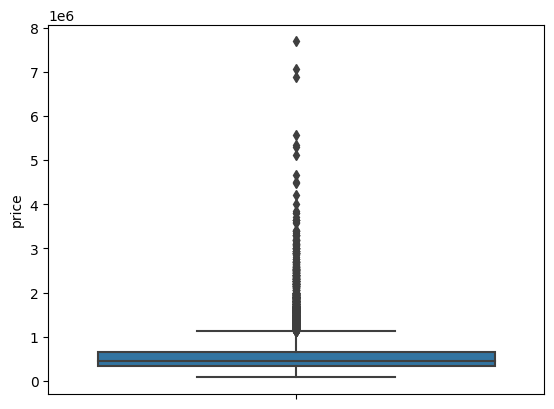

In [ ]:
sns.boxplot( y=X["price"], data=X)

In [ ]:
lower_limit =X["price"].quantile(0.03)  
upper_limit =X["price"].quantile(0.97)

print(lower_limit)
print(upper_limit)

191342.0
1388000.0


In [ ]:
X["price_nw"] = np.where(X["price"]> upper_limit, upper_limit,
                        np.where(X["price"]< lower_limit, lower_limit,
                          X["price"]))

<Axes: ylabel='price_nw'>

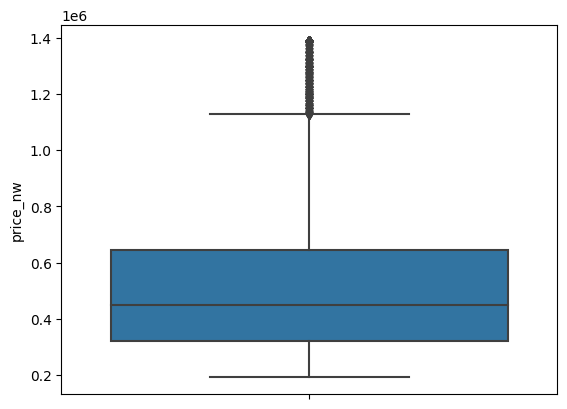

In [ ]:
sns.boxplot( y=X["price_nw"], data=X)

In [ ]:
Xout=X.drop(columns='price',axis=1)

In [ ]:
Xout

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_nw
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,191342.0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0,400000.0


In [ ]:
std=StandardScaler()
Xout=std.fit_transform(Xout)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xout,y,test_size=0.3,random_state=1)

In [ ]:
knn=KNeighborsClassifier()
svm=SVC()
nb=GaussianNB()
rf=RandomForestClassifier()
lr=LogisticRegression()
abc=AdaBoostClassifier()
xgb=XGBClassifier()
dt=DecisionTreeClassifier()
ls=[knn,svm,nb,rf,lr,abc,xgb,dt]
lis=[]
for i in ls:
  i.fit(X_train,y_train)
  ypred=i.predict(X_test)
  ac=accuracy_score(ypred,y_test)
  lis.append(ac)
lis

[0.8861813695249846,
 0.8900370141887723,
 0.7788402220851326,
 0.9005243676742751,
 0.8858729179518815,
 0.838371375694016,
 0.8980567550894509,
 0.8547193090684763]

In [ ]:
eval['Accuracy after outlier removal']=lis


#Accuracy Analysis

In [ ]:
eval.style.highlight_max(subset=['Accuracy with tuning','Accuracy with sampling','Accuracy after PCA','Accuracy after outlier removal'],color ='lightgreen')

,model,Accuracy with tuning,Accuracy with sampling,Accuracy after PCA,Accuracy after outlier removal
0,K Nearest Neighbour,89.188772,91.350149,0.874306,0.886181
1,Support Vector Machine,89.080814,68.923743,0.883868,0.890037
2,Naive Bayes,78.177051,75.566220,0.814466,0.778840
3,Random Forest,89.975324,96.675835,0.873381,0.900524
4,Logistic Regression,88.541024,63.252765,0.872610,0.885873
5,Adaboost,83.837138,51.284602,0.843152,0.838371
6,Extreme Gradient Boost,89.620605,96.588049,0.881709,0.898057
7,Decision Tree,85.425663,94.457775,0.832202,0.854719


Highest accuracy is obtained after sampling with Randomforest Classification algorithm.

Predicting grade of new input



*   Using Random Forest Classification



In [ ]:
new=[[2,5,1860,4000,1,0,0,4,0,0,2008,0,500000]]
y_new=rf.predict(std.transform(new))
if y_new==0:
  print('Bad')
elif y_new==1:
  print('Below Average')
elif y_new==2:
  print('Average')
elif y_new==3:
  print('Above Average')
else:
  print('Good')

Average




*   Using SVM Classification



In [ ]:
new=[[2,5,1860,4000,1,0,0,4,0,0,2008,0,500000]]
y_new=svm.predict(std.transform(new))
if y_new==0:
  print('Bad')
elif y_new==1:
  print('Below Average')
elif y_new==2:
  print('Average')
elif y_new==3:
  print('Above Average')
else:
  print('Good')

Average


#REGRESSION

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,2,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,2,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,2,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,2,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,2,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,2,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,2,1600,0,2004,0


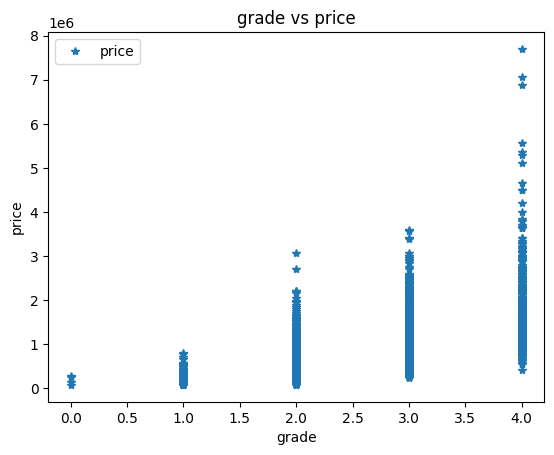

In [ ]:
df.plot(x='grade',y='price',style='*')
plt.title('grade vs price')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()


In [ ]:
Xr=df.drop(['price'],axis=1)
Xr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.00,1180,5650,1.0,0,0,3,2,1180,0,1955,0
1,3,2.25,2570,7242,2.0,0,0,3,2,2170,400,1951,1991
2,2,1.00,770,10000,1.0,0,0,3,2,770,0,1933,0
3,4,3.00,1960,5000,1.0,0,0,5,2,1050,910,1965,0
4,3,2.00,1680,8080,1.0,0,0,3,2,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,2,1530,0,2009,0
21609,4,2.50,2310,5813,2.0,0,0,3,2,2310,0,2014,0
21610,2,0.75,1020,1350,2.0,0,0,3,2,1020,0,2009,0
21611,3,2.50,1600,2388,2.0,0,0,3,2,1600,0,2004,0


In [ ]:
yr=df['price']
yr

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
st=StandardScaler()
Xl=st.fit_transform(Xr)
Xl

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.65868104,
        -0.54489777, -0.21012839],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.2451414 ,
        -0.6810785 ,  4.7466776 ],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.65868104,
        -1.29389179, -0.21012839],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.65868104,
         1.29354209, -0.21012839],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.65868104,
         1.12331618, -0.21012839],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.65868104,
         1.25949691, -0.21012839]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xl,yr,test_size=0.3,random_state=1)

###Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
R1=r2_score(y_test,y_pred)
M1=mean_absolute_error(y_test,y_pred)
MS1=mean_squared_error(y_test,y_pred)
RMS1=np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score',R1)
print('Mean Absolute Error',M1)
print('Mean Squared Error',MS1)
print('Root Mean Squared Error',RMS1)

R2 Score 0.6419242756365184
Mean Absolute Error 146515.59925635284
Mean Squared Error 55884993006.0205
Root Mean Squared Error 236400.06980967772


In [ ]:
result=pd.DataFrame({'actual':y_test,'predicted after lr':y_pred})
result

,actual,predicted after lr
15544,459000.0,7.671521e+05
17454,445000.0,3.422684e+05
21548,1057000.0,8.377726e+05
3427,732350.0,6.975830e+05
8809,235000.0,4.400033e+05
...,...,...
14866,394500.0,5.639031e+05
4903,259950.0,3.342382e+05
16080,230000.0,4.448969e+05
15668,1680000.0,2.230704e+06


###Decision tree Regression

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
R2=r2_score(y_test,y_pred)
M2=mean_absolute_error(y_test,y_pred)
MS2=mean_squared_error(y_test,y_pred)
RMS2=np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score',R2)
print('Mean Absolute Error',M2)
print('Mean Squared Error',MS2)
print('Root Mean Squared Error',RMS2)

R2 Score 0.433529179304842
Mean Absolute Error 179446.9369987662
Mean Squared Error 88409282446.99564
Root Mean Squared Error 297336.9846604953


In [ ]:
result=pd.DataFrame({'actual':y_test,'predicted after dt':y_pred})
result

,actual,predicted after dt
15544,459000.0,375000.0
17454,445000.0,240000.0
21548,1057000.0,745000.0
3427,732350.0,565000.0
8809,235000.0,249000.0
...,...,...
14866,394500.0,585000.0
4903,259950.0,265950.0
16080,230000.0,530000.0
15668,1680000.0,3567000.0


###Support Vector Regression

In [ ]:
sv=SVR()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
R3=r2_score(y_test,y_pred)
M3=mean_absolute_error(y_test,y_pred)
MS3=mean_squared_error(y_test,y_pred)
RMS3=np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score',R3)
print('Mean Absolute Error',M3)
print('Mean Squared Error',MS3)
print('Root Mean Squared Error',RMS3)

R2 Score -0.05565639864544525
Mean Absolute Error 227467.90025593035
Mean Squared Error 164756632301.5394
Root Mean Squared Error 405902.2447604095


In [ ]:
result=pd.DataFrame({'actual':y_test,'predicted after svr':y_pred})
result

,actual,predicted after svr
15544,459000.0,452061.532459
17454,445000.0,449834.944574
21548,1057000.0,451556.279856
3427,732350.0,451647.573362
8809,235000.0,450037.113026
...,...,...
14866,394500.0,451499.022413
4903,259950.0,449599.068030
16080,230000.0,450008.267764
15668,1680000.0,451470.380550


###Randomforest Regression

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
R4=r2_score(y_test,y_pred)
M4=mean_absolute_error(y_test,y_pred)
MS4=mean_squared_error(y_test,y_pred)
RMS4=np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score',R4)
print('Mean Absolute Error',M4)
print('Mean Squared Error',MS4)
print('Root Mean Squared Error',RMS4)

R2 Score 0.7077969920167657
Mean Absolute Error 132136.4617476548
Mean Squared Error 45604217059.14056
Root Mean Squared Error 213551.4389067434


In [ ]:
result=pd.DataFrame({'actual':y_test,'predicted after rf':y_pred})
result

,actual,predicted after rf
15544,459000.0,6.705119e+05
17454,445000.0,3.186800e+05
21548,1057000.0,7.776159e+05
3427,732350.0,5.519123e+05
8809,235000.0,3.835925e+05
...,...,...
14866,394500.0,4.995538e+05
4903,259950.0,3.729180e+05
16080,230000.0,4.028940e+05
15668,1680000.0,2.525200e+06


###Error Analysis

In [ ]:
reg=pd.DataFrame({'models':['Linear Regression','Decision Tree Regression','Support Vector Regression','Random Forest Regression'],'R2 score':[R1,R2,R3,R4],'Mean Absolute Error':[M1,M2,M3,M4],'Mean Square error':[MS1,MS2,MS3,MS4],'Root Mean Squared Error':[RMS1,RMS2,RMS3,RMS4]})
reg.style.highlight_min(subset=['R2 score','Mean Absolute Error','Mean Square error','Root Mean Squared Error'],color='pink')

,models,R2 score,Mean Absolute Error,Mean Square error,Root Mean Squared Error
0,Linear Regression,0.641924,146515.599256,55884993006.020500,236400.069810
1,Decision Tree Regression,0.433529,179446.936999,88409282446.995636,297336.984660
2,Support Vector Regression,-0.055656,227467.900256,164756632301.539398,405902.244760
3,Random Forest Regression,0.707797,132136.461748,45604217059.140556,213551.438907


Predicting price with new input



*   Using Support Vector Regression model:



In [ ]:
x=[[2,5,1860,4000,1,0,0,4,4,1230,0,2008,0]]
y_pred=sv.predict(x)
y_pred

array([451461.80011874])



*   Using Random Forest Regression model:



In [ ]:
x=[[2,5,1860,4000,1,0,0,4,4,1230,0,2008,0]]
y_pred=dt.predict(x)
y_pred

array([5570000.])